# **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

# **Load the dataset**

In [ ]:
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/life_expectancy.csv')

In [ ]:
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
print(data.columns.tolist())

['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years', 'thinness 5-9 years', 'Income composition of resources', 'Schooling']


# **Data Preprocessing**

In [ ]:
# Clean column names by stripping leading and trailing spaces
data.columns = data.columns.str.strip()

In [ ]:
# Print the cleaned column names to verify
print("Cleaned Column Names in the Dataset:")
print(data.columns.tolist())

Cleaned Column Names in the Dataset:
['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years', 'thinness 5-9 years', 'Income composition of resources', 'Schooling']


In [ ]:
# Identify missing values
print("\nMissing Values in the Dataset:")
print(data.isnull().sum())


Missing Values in the Dataset:
Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64


In [ ]:
# Handle missing values using SimpleImputer
# Using mean strategy for numerical columns
imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data.select_dtypes(include=[np.number])), columns=data.select_dtypes(include=[np.number]).columns)

In [ ]:
# Re-attach non-numerical columns
data_imputed = pd.concat([data.select_dtypes(exclude=[np.number]), data_imputed], axis=1)

In [ ]:

# Check if all missing values are handled
print("\nMissing Values After Imputation:")
print(data_imputed.isnull().sum())


Missing Values After Imputation:
Country                            0
Status                             0
Year                               0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64


## **Feature and target columns**

In [ ]:
# Feature and target columns
features = ['Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness 1-19 years', 'thinness 5-9 years', 'Income composition of resources', 'Schooling']
target = 'Life expectancy'

In [ ]:
# Remove missing features from the list
features = [feature for feature in features if feature in data_imputed.columns]

In [ ]:
# Adjust target column name
if target not in data_imputed.columns:
    target = 'Life expectancy '  # Adjust to match the cleaned column name

In [ ]:
# Feature and target data
X = data_imputed[features]
y = data_imputed[target]

# **Normalize the features**

In [ ]:
# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# **Split the dataset**

In [ ]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# **Linear Regression with Normal Equation**

In [ ]:
# Linear Regression with Normal Equation
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predict and evaluate
y_pred_normal_eq = lr.predict(X_test)
mse_normal_eq = mean_squared_error(y_test, y_pred_normal_eq)
r2_normal_eq = r2_score(y_test, y_pred_normal_eq)
print(f"\nMean Squared Error (Normal Equation): {mse_normal_eq:.2f}")
print(f"R-squared (Normal Equation): {r2_normal_eq:.2f}")



Mean Squared Error (Normal Equation): 15.36
R-squared (Normal Equation): 0.82


# **Linear Regression with Gradient Descent**

In [ ]:
# Linear Regression with Gradient Descent
class GradientDescentLinearRegression:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs

    def fit(self, X, y):
        m, n = X.shape
        self.theta = np.zeros(n)
        self.bias = 0

        for _ in range(self.epochs):
            y_pred = X.dot(self.theta) + self.bias
            d_theta = (-2/m) * X.T.dot(y - y_pred)
            d_bias = (-2/m) * np.sum(y - y_pred)
            self.theta -= self.learning_rate * d_theta
            self.bias -= self.learning_rate * d_bias

    def predict(self, X):
        return X.dot(self.theta) + self.bias

In [ ]:
# Initialize and train the model
gd_lr = GradientDescentLinearRegression(learning_rate=0.01, epochs=1000)
gd_lr.fit(X_train, y_train)

In [ ]:
# Predict and evaluate
y_pred_gd = gd_lr.predict(X_test)
mse_gd = mean_squared_error(y_test, y_pred_gd)
r2_gd = r2_score(y_test, y_pred_gd)
print(f"Mean Squared Error (Gradient Descent): {mse_gd:.2f}")
print(f"R-squared (Gradient Descent): {r2_gd:.2f}")

Mean Squared Error (Gradient Descent): 16.35
R-squared (Gradient Descent): 0.81


# **Comparing Performance**

In [ ]:
# Accuracy comparison
print("\nAccuracy Comparison:")
print(f"Mean Squared Error (Normal Equation): {mse_normal_eq:.2f}")
print(f"R-squared (Normal Equation): {r2_normal_eq:.2f}")
print(f"Mean Squared Error (Gradient Descent): {mse_gd:.2f}")
print(f"R-squared (Gradient Descent): {r2_gd:.2f}")
print("\n")
if mse_normal_eq < mse_gd:
    print("The Normal Equation method performed better.")
else:
    print("The Gradient Descent method performed better.")


Accuracy Comparison:
Mean Squared Error (Normal Equation): 15.36
R-squared (Normal Equation): 0.82
Mean Squared Error (Gradient Descent): 16.35
R-squared (Gradient Descent): 0.81


The Normal Equation method performed better.


# **Plotting actual vs predicted values for both method**

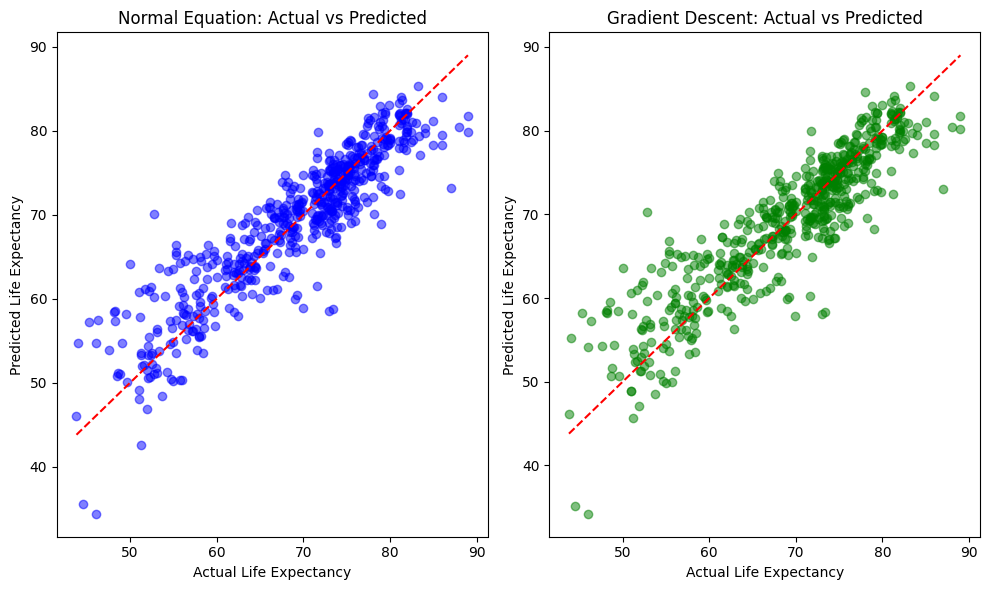

In [ ]:
# Plot for Linear Regression Visualization
plt.figure(figsize=(10, 6))

# Scatter plot of actual vs predicted values (Normal Equation)
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_normal_eq, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Normal Equation: Actual vs Predicted')
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')

# Scatter plot of actual vs predicted values (Gradient Descent)
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_gd, color='green', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Gradient Descent: Actual vs Predicted')
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')

plt.tight_layout()
plt.show()
